## This notebook tests the 4 trained models on a new dataset.
## https://www.kaggle.com/datasets/danrasband/asl-alphabet-test

In [1]:
import pandas
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras import layers
from keras import regularizers
from keras.utils import np_utils
from keras import callbacks
import tensorflow as tf
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd Desktop\ENEL_final_project

C:\Users\nehag\OneDrive - University of Calgary\Desktop\ENEL_final_project


In [3]:
model = keras.models.load_model('Sequential-LowWeight.h5')

In [63]:
testfile = 'archive/asl_alphabet_test/asl-alphabet-test'
testfile1 = 'archive_test/asl-alphabet-test'
testfile2 = 'archive_test1/testCaptures/testCaptures'

In [35]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    testfile1,
    validation_split=0,
    seed=42,
    image_size=(32,32),
)

Found 870 files belonging to 29 classes.


In [36]:
class_names = test_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


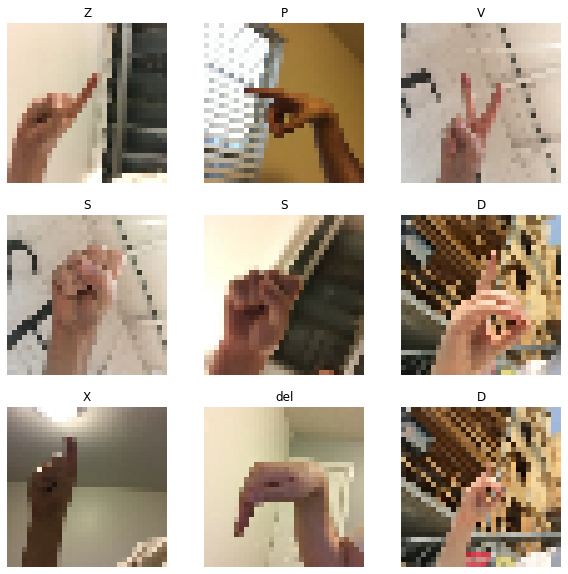

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [75]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25,'space':26,'del':27,'nothing':28}
def load_data():

    """
    Loads sign language dataset.
    """
    
    #size = 60,60
    images, labels = [], []

    for folder in os.listdir(testfile1):
        
        print(folder, end = ' | ')
        for image in os.listdir(testfile1 + "/" + folder):
            temp_img = cv2.imread(testfile1 + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, (32,32))
            #temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
            images.append(temp_img)
            labels.append(labels_dict[folder])

            
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    #X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.05, random_state=42)
    test_images = images
    
    print()
    print('Loaded', len(test_images),'images for testing,','test data shape =',test_images.shape)
    #print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return test_images, labels

In [94]:
x_test, labels = load_data()

labels1 = keras.utils.np_utils.to_categorical(labels,29)
#y_test_ = keras.utils.np_utils.to_categorical(y_test,29)

A | B | C | D | del | E | F | G | H | I | J | K | L | M | N | nothing | O | P | Q | R | S | space | T | U | V | W | X | Y | Z | 
Loaded 870 images for testing, test data shape = (870, 32, 32, 3)


In [95]:
print("test shape  -> ", x_test.shape)
#print("labels shape -> ", labels.shape)
print("labels shape -> ", labels1.shape)
print("len labels    -> ", len(labels))

test shape  ->  (870, 32, 32, 3)
labels shape ->  (870, 29)
len labels    ->  870


In [107]:
labels2 = np.array(labels)

# Low weight sequential

In [90]:
def evaluate_model(model):
    test_loss,test_acc = model.evaluate(x_test, labels2)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

28/28 [==============================] - 0s 3ms/step - loss: 15.4925 - accuracy: 0.0345
Test accuracy: 0.03448275849223137
Test loss: 15.492470741271973


# High weight sequential

In [100]:
model1 = keras.models.load_model('Sequential-HighWeight.h5')

In [101]:
def evaluate_model(model):
    test_loss,test_acc = model1.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

28/28 [==============================] - 0s 11ms/step - loss: 16.3739 - accuracy: 0.1954
Test accuracy: 0.19540229439735413
Test loss: 16.373889923095703


# DenseNet121

In [103]:
model2 = keras.models.load_model('ASL_DenseNet121.h5')

In [104]:
def evaluate_model(model):
    test_loss,test_acc = model2.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

28/28 [==============================] - 3s 58ms/step - loss: 6.4499 - accuracy: 0.1770
Test accuracy: 0.17701148986816406
Test loss: 6.449873924255371


# MobileNet

In [105]:
model3 = keras.models.load_model('ASL_MobileNet.h5')

In [106]:
def evaluate_model(model):
    test_loss,test_acc = model3.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

28/28 [==============================] - 1s 14ms/step - loss: 7.4719 - accuracy: 0.2161
Test accuracy: 0.21609196066856384
Test loss: 7.471902370452881


# High weight retrained on 200x200 FOR 30 EPOCHS

In [11]:
model4 = keras.models.load_model('Sequential-HighWeight_30epoch_200x200.h5')

In [3]:
testfile = 'archive_test/asl-alphabet-test'
testfile1 = 'archive_test/asl-alphabet-test'
testfile2 = 'archive_test1/testCaptures/testCaptures'

In [4]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    testfile1,
    validation_split=0,
    seed=42,
    image_size=(200,200),
)

Found 870 files belonging to 29 classes.


In [5]:
class_names = test_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


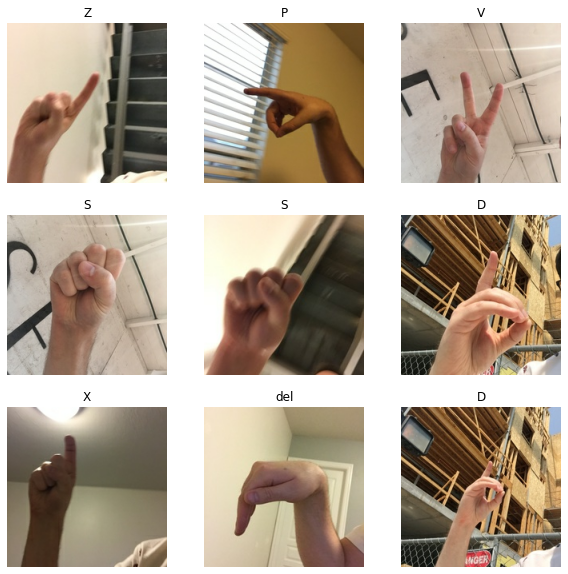

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25,'space':26,'del':27,'nothing':28}
def load_data():

    """
    Loads sign language dataset.
    """
    
    #size = 60,60
    images, labels = [], []

    for folder in os.listdir(testfile1):
        
        print(folder, end = ' | ')
        for image in os.listdir(testfile1 + "/" + folder):
            temp_img = cv2.imread(testfile1 + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, (200,200))
            #temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
            images.append(temp_img)
            labels.append(labels_dict[folder])

            
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    #X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.05, random_state=42)
    test_images = images
    
    print()
    print('Loaded', len(test_images),'images for testing,','test data shape =',test_images.shape)
    #print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return test_images, labels

In [8]:
x_test, labels = load_data()

labels1 = keras.utils.np_utils.to_categorical(labels,29)
#y_test_ = keras.utils.np_utils.to_categorical(y_test,29)

A | B | C | D | del | E | F | G | H | I | J | K | L | M | N | nothing | O | P | Q | R | S | space | T | U | V | W | X | Y | Z | 
Loaded 870 images for testing, test data shape = (870, 200, 200, 3)


In [9]:
print("test shape  -> ", x_test.shape)
#print("labels shape -> ", labels.shape)
print("labels shape -> ", labels1.shape)
print("len labels    -> ", len(labels))

test shape  ->  (870, 200, 200, 3)
labels shape ->  (870, 29)
len labels    ->  870


In [10]:
labels2 = np.array(labels)

In [14]:
def evaluate_model(model):
    test_loss,test_acc = model4.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model4)

28/28 [==============================] - 7s 225ms/step - loss: 5.4606 - accuracy: 0.1207
Test accuracy: 0.12068965286016464
Test loss: 5.460601806640625


# ----------------------------------------------------------------------------------------
# test eval on part of original dataset used for training

In [1]:
import pandas
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras import layers
from keras import regularizers
from keras.utils import np_utils
from keras import callbacks
import tensorflow as tf
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd Desktop\ENEL_final_project

C:\Users\nehag\OneDrive - University of Calgary\Desktop\ENEL_final_project


In [3]:
model = keras.models.load_model('Sequential-LowWeight.h5')

In [7]:
testfile = 'archive/asl_alphabet_test/asl_alphabet_test'
testfile1 = 'archive_test/asl-alphabet-test'
testfile2 = 'archive_test1/testCaptures/testCaptures'

In [8]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    testfile,
    validation_split=0,
    seed=42,
    image_size=(32,32),
)

Found 28 files belonging to 28 classes.


In [9]:
class_names = test_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing', 'space']


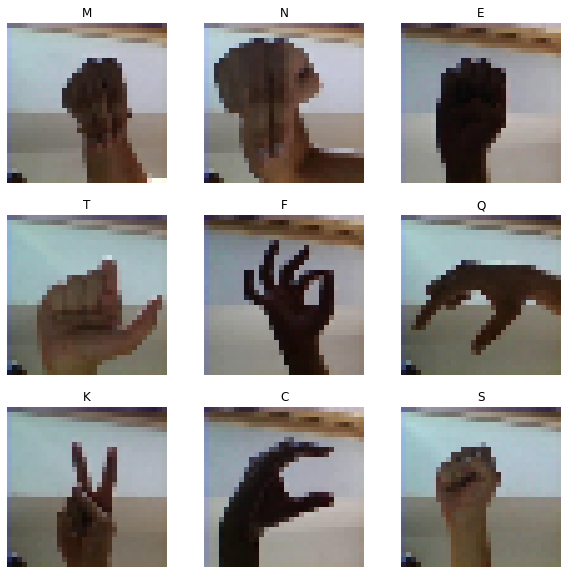

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25,'space':26,'del':27,'nothing':28}
def load_data():

    """
    Loads sign language dataset.
    """
    
    #size = 60,60
    images, labels = [], []

    for folder in os.listdir(testfile):
        
        print(folder, end = ' | ')
        for image in os.listdir(testfile + "/" + folder):
            temp_img = cv2.imread(testfile + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, (32,32))
            #temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
            images.append(temp_img)
            labels.append(labels_dict[folder])

            
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    #X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.05, random_state=42)
    test_images = images
    
    print()
    print('Loaded', len(test_images),'images for testing,','test data shape =',test_images.shape)
    #print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return test_images, labels

In [13]:
x_test, labels = load_data()

labels1 = keras.utils.np_utils.to_categorical(labels,29)
#y_test_ = keras.utils.np_utils.to_categorical(y_test,29)

A | B | C | D | E | F | G | H | I | J | K | L | M | N | nothing | O | P | Q | R | S | space | T | U | V | W | X | Y | Z | 
Loaded 28 images for testing, test data shape = (28, 32, 32, 3)


In [14]:
print("test shape  -> ", x_test.shape)
#print("labels shape -> ", labels.shape)
print("labels shape -> ", labels1.shape)
print("len labels    -> ", len(labels))

test shape  ->  (28, 32, 32, 3)
labels shape ->  (28, 29)
len labels    ->  28


In [15]:
labels2 = np.array(labels)

# Low weight sequential

In [20]:
def evaluate_model(model):
    test_loss,test_acc = model.evaluate(x_test, labels2)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

1/1 [==============================] - 0s 16ms/step - loss: 16.0308 - accuracy: 0.0357
Test accuracy: 0.0357142873108387
Test loss: 16.030834197998047


# High weight sequential

In [17]:
model1 = keras.models.load_model('Sequential-HighWeight.h5')

In [18]:
def evaluate_model(model):
    test_loss,test_acc = model1.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model1)

1/1 [==============================] - 0s 91ms/step - loss: 1.1455e-04 - accuracy: 1.0000
Test accuracy: 1.0
Test loss: 0.0001145469504990615


# DenseNet121

In [21]:
model2 = keras.models.load_model('ASL_DenseNet121.h5')

In [22]:
def evaluate_model(model):
    test_loss,test_acc = model2.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model2)

1/1 [==============================] - 1s 927ms/step - loss: 6.9851e-05 - accuracy: 1.0000
Test accuracy: 1.0
Test loss: 6.98505828040652e-05


# MobileNet

In [23]:
model3 = keras.models.load_model('ASL_MobileNet.h5')

In [24]:
def evaluate_model(model):
    test_loss,test_acc = model3.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model3)

1/1 [==============================] - 0s 256ms/step - loss: 1.6804e-04 - accuracy: 1.0000
Test accuracy: 1.0
Test loss: 0.00016803611651994288


# High weight retrained on 200x200 FOR 30 EPOCHS

In [25]:
model4 = keras.models.load_model('Sequential-HighWeight_30epoch_200x200.h5')

In [3]:
testfile = 'archive_test/asl-alphabet-test'
testfile1 = 'archive_test/asl-alphabet-test'
testfile2 = 'archive_test1/testCaptures/testCaptures'

In [27]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    testfile,
    validation_split=0,
    seed=42,
    image_size=(200,200),
)

Found 28 files belonging to 28 classes.


In [28]:
class_names = test_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing', 'space']


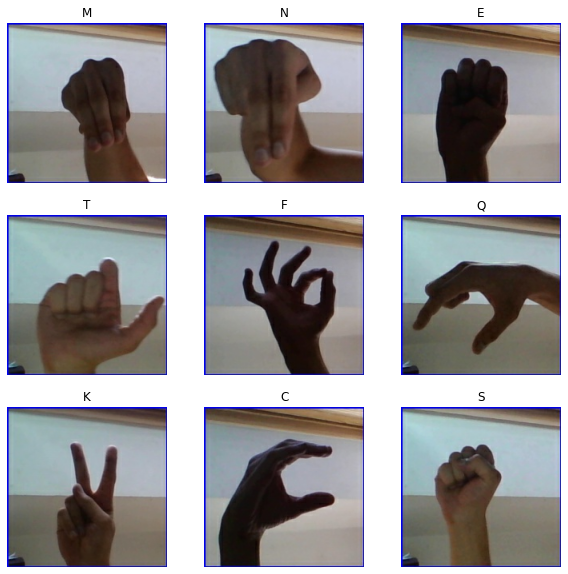

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [30]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25,'space':26,'del':27,'nothing':28}
def load_data():

    """
    Loads sign language dataset.
    """
    
    #size = 60,60
    images, labels = [], []

    for folder in os.listdir(testfile):
        
        print(folder, end = ' | ')
        for image in os.listdir(testfile + "/" + folder):
            temp_img = cv2.imread(testfile + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, (200,200))
            #temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
            images.append(temp_img)
            labels.append(labels_dict[folder])

            
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    #X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.05, random_state=42)
    test_images = images
    
    print()
    print('Loaded', len(test_images),'images for testing,','test data shape =',test_images.shape)
    #print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return test_images, labels

In [31]:
x_test, labels = load_data()

labels1 = keras.utils.np_utils.to_categorical(labels,29)
#y_test_ = keras.utils.np_utils.to_categorical(y_test,29)

A | B | C | D | E | F | G | H | I | J | K | L | M | N | nothing | O | P | Q | R | S | space | T | U | V | W | X | Y | Z | 
Loaded 28 images for testing, test data shape = (28, 200, 200, 3)


In [32]:
print("test shape  -> ", x_test.shape)
#print("labels shape -> ", labels.shape)
print("labels shape -> ", labels1.shape)
print("len labels    -> ", len(labels))

test shape  ->  (28, 200, 200, 3)
labels shape ->  (28, 29)
len labels    ->  28


In [33]:
labels2 = np.array(labels)

In [34]:
def evaluate_model(model):
    test_loss,test_acc = model4.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model4)

1/1 [==============================] - 0s 277ms/step - loss: 0.6786 - accuracy: 0.7500
Test accuracy: 0.75
Test loss: 0.6786184310913086


# TESTING ON 4K split from training directory

In [44]:


labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25,'space':26,'del':27,'nothing':28}

def load_data():

    """
    Loads sign language dataset.
    """
    
    #size = 60,60
    images, labels = [], []

    for folder in os.listdir(trainfile):
        
        print(folder, end = ' | ')
        for image in os.listdir(trainfile + "/" + folder):
            temp_img = cv2.imread(trainfile + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, (32,32))
            #temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
            images.append(temp_img)
            labels.append(labels_dict[folder])

            
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.05, random_state=42)
    
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [45]:
X_train, X_test, y_train, y_test = load_data()

y_train_ = keras.utils.np_utils.to_categorical(y_train,29)
y_test_ = keras.utils.np_utils.to_categorical(y_test,29)

A | B | C | D | del | E | F | G | H | I | J | K | L | M | N | nothing | O | P | Q | R | S | space | T | U | V | W | X | Y | Z | 
Loaded 82650 images for training, Train data shape = (82650, 32, 32, 3)
Loaded 4350 images for testing Test data shape = (4350, 32, 32, 3)


In [46]:
print("X_train shape  -> ", X_train.shape)
print("X_test shape   -> ", X_test.shape)
print("y_train_ shape -> ", y_train_.shape)
print("y_test_ shape  -> ", y_test_.shape)
print("len y_train    -> ", len(y_train))

X_train shape  ->  (82650, 32, 32, 3)
X_test shape   ->  (4350, 32, 32, 3)
y_train_ shape ->  (82650, 29)
y_test_ shape  ->  (4350, 29)
len y_train    ->  82650


In [47]:
y_test2 = np.array(y_test)

# Low weight seq

In [50]:
model = keras.models.load_model('Sequential-LowWeight.h5')
def evaluate_model(model):
    test_loss,test_acc = model.evaluate(X_test, y_test2)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

136/136 [==============================] - 0s 3ms/step - loss: 15.4621 - accuracy: 0.0294
Test accuracy: 0.02942528761923313
Test loss: 15.462098121643066


# High weight sequential

In [51]:
model1 = keras.models.load_model('Sequential-HighWeight.h5')

In [53]:
def evaluate_model(model):
    test_loss,test_acc = model1.evaluate(X_test, y_test_)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model1)

136/136 [==============================] - 2s 11ms/step - loss: 6.4557e-05 - accuracy: 1.0000
Test accuracy: 1.0
Test loss: 6.455728725995868e-05


# DenseNet121

In [54]:
model2 = keras.models.load_model('ASL_DenseNet121.h5')

In [55]:
def evaluate_model(model):
    test_loss,test_acc = model2.evaluate(X_test, y_test_)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model2)

136/136 [==============================] - 9s 59ms/step - loss: 4.6333e-04 - accuracy: 1.0000
Test accuracy: 1.0
Test loss: 0.00046333434875123203


# MobileNet

In [56]:
model3 = keras.models.load_model('ASL_MobileNet.h5')

In [57]:
def evaluate_model(model):
    test_loss,test_acc = model3.evaluate(X_test, y_test_)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model3)

136/136 [==============================] - 2s 14ms/step - loss: 0.0068 - accuracy: 0.9984
Test accuracy: 0.998390793800354
Test loss: 0.00681076617911458


In [ ]:
## This notebook tests the 4 trained models on a new dataset.
## https://www.kaggle.com/datasets/danrasband/asl-alphabet-test

import pandas
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras import layers
from keras import regularizers
from keras.utils import np_utils
from keras import callbacks
import tensorflow as tf
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

cd Desktop\ENEL_final_project

model = keras.models.load_model('Sequential-LowWeight.h5')

testfile = 'archive/asl_alphabet_test/asl-alphabet-test'
testfile1 = 'archive_test/asl-alphabet-test'
testfile2 = 'archive_test1/testCaptures/testCaptures'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    testfile1,
    validation_split=0,
    seed=42,
    image_size=(32,32),
)

class_names = test_ds.class_names
print(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")



labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25,'space':26,'del':27,'nothing':28}
def load_data():

    """
    Loads sign language dataset.
    """
    
    #size = 60,60
    images, labels = [], []

    for folder in os.listdir(testfile1):
        
        print(folder, end = ' | ')
        for image in os.listdir(testfile1 + "/" + folder):
            temp_img = cv2.imread(testfile1 + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, (32,32))
            #temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
            images.append(temp_img)
            labels.append(labels_dict[folder])

            
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    #X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.05, random_state=42)
    test_images = images
    
    print()
    print('Loaded', len(test_images),'images for testing,','test data shape =',test_images.shape)
    #print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return test_images, labels

x_test, labels = load_data()

labels1 = keras.utils.np_utils.to_categorical(labels,29)
#y_test_ = keras.utils.np_utils.to_categorical(y_test,29)

print("test shape  -> ", x_test.shape)
#print("labels shape -> ", labels.shape)
print("labels shape -> ", labels1.shape)
print("len labels    -> ", len(labels))

labels2 = np.array(labels)

# Low weight sequential

def evaluate_model(model):
    test_loss,test_acc = model.evaluate(x_test, labels2)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

# High weight sequential

model1 = keras.models.load_model('Sequential-HighWeight.h5')

def evaluate_model(model):
    test_loss,test_acc = model1.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

# DenseNet121

model2 = keras.models.load_model('ASL_DenseNet121.h5')

def evaluate_model(model):
    test_loss,test_acc = model2.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

# MobileNet

model3 = keras.models.load_model('ASL_MobileNet.h5')

def evaluate_model(model):
    test_loss,test_acc = model3.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

# High weight retrained on 200x200 FOR 30 EPOCHS

model4 = keras.models.load_model('Sequential-HighWeight_30epoch_200x200.h5')

testfile = 'archive_test/asl-alphabet-test'
testfile1 = 'archive_test/asl-alphabet-test'
testfile2 = 'archive_test1/testCaptures/testCaptures'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    testfile1,
    validation_split=0,
    seed=42,
    image_size=(200,200),
)

class_names = test_ds.class_names
print(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")



labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25,'space':26,'del':27,'nothing':28}
def load_data():

    """
    Loads sign language dataset.
    """
    
    #size = 60,60
    images, labels = [], []

    for folder in os.listdir(testfile1):
        
        print(folder, end = ' | ')
        for image in os.listdir(testfile1 + "/" + folder):
            temp_img = cv2.imread(testfile1 + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, (200,200))
            #temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
            images.append(temp_img)
            labels.append(labels_dict[folder])

            
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    #X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.05, random_state=42)
    test_images = images
    
    print()
    print('Loaded', len(test_images),'images for testing,','test data shape =',test_images.shape)
    #print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return test_images, labels

x_test, labels = load_data()

labels1 = keras.utils.np_utils.to_categorical(labels,29)
#y_test_ = keras.utils.np_utils.to_categorical(y_test,29)

print("test shape  -> ", x_test.shape)
#print("labels shape -> ", labels.shape)
print("labels shape -> ", labels1.shape)
print("len labels    -> ", len(labels))

labels2 = np.array(labels)

def evaluate_model(model):
    test_loss,test_acc = model4.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model4)

# ----------------------------------------------------------------------------------------
# test eval on part of original dataset used for training

import pandas
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras import layers
from keras import regularizers
from keras.utils import np_utils
from keras import callbacks
import tensorflow as tf
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

cd Desktop\ENEL_final_project

model = keras.models.load_model('Sequential-LowWeight.h5')

testfile = 'archive/asl_alphabet_test/asl_alphabet_test'
testfile1 = 'archive_test/asl-alphabet-test'
testfile2 = 'archive_test1/testCaptures/testCaptures'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    testfile,
    validation_split=0,
    seed=42,
    image_size=(32,32),
)

class_names = test_ds.class_names
print(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")



labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25,'space':26,'del':27,'nothing':28}
def load_data():

    """
    Loads sign language dataset.
    """
    
    #size = 60,60
    images, labels = [], []

    for folder in os.listdir(testfile):
        
        print(folder, end = ' | ')
        for image in os.listdir(testfile + "/" + folder):
            temp_img = cv2.imread(testfile + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, (32,32))
            #temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
            images.append(temp_img)
            labels.append(labels_dict[folder])

            
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    #X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.05, random_state=42)
    test_images = images
    
    print()
    print('Loaded', len(test_images),'images for testing,','test data shape =',test_images.shape)
    #print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return test_images, labels

x_test, labels = load_data()

labels1 = keras.utils.np_utils.to_categorical(labels,29)
#y_test_ = keras.utils.np_utils.to_categorical(y_test,29)

print("test shape  -> ", x_test.shape)
#print("labels shape -> ", labels.shape)
print("labels shape -> ", labels1.shape)
print("len labels    -> ", len(labels))

labels2 = np.array(labels)

# Low weight sequential

def evaluate_model(model):
    test_loss,test_acc = model.evaluate(x_test, labels2)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

# High weight sequential

model1 = keras.models.load_model('Sequential-HighWeight.h5')

def evaluate_model(model):
    test_loss,test_acc = model1.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model1)

# DenseNet121

model2 = keras.models.load_model('ASL_DenseNet121.h5')

def evaluate_model(model):
    test_loss,test_acc = model2.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model2)

# MobileNet

model3 = keras.models.load_model('ASL_MobileNet.h5')

def evaluate_model(model):
    test_loss,test_acc = model3.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model3)

# High weight retrained on 200x200 FOR 30 EPOCHS

model4 = keras.models.load_model('Sequential-HighWeight_30epoch_200x200.h5')

testfile = 'archive_test/asl-alphabet-test'
testfile1 = 'archive_test/asl-alphabet-test'
testfile2 = 'archive_test1/testCaptures/testCaptures'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    testfile,
    validation_split=0,
    seed=42,
    image_size=(200,200),
)

class_names = test_ds.class_names
print(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")



labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25,'space':26,'del':27,'nothing':28}
def load_data():

    """
    Loads sign language dataset.
    """
    
    #size = 60,60
    images, labels = [], []

    for folder in os.listdir(testfile):
        
        print(folder, end = ' | ')
        for image in os.listdir(testfile + "/" + folder):
            temp_img = cv2.imread(testfile + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, (200,200))
            #temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
            images.append(temp_img)
            labels.append(labels_dict[folder])

            
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    #X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.05, random_state=42)
    test_images = images
    
    print()
    print('Loaded', len(test_images),'images for testing,','test data shape =',test_images.shape)
    #print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return test_images, labels

x_test, labels = load_data()

labels1 = keras.utils.np_utils.to_categorical(labels,29)
#y_test_ = keras.utils.np_utils.to_categorical(y_test,29)

print("test shape  -> ", x_test.shape)
#print("labels shape -> ", labels.shape)
print("labels shape -> ", labels1.shape)
print("len labels    -> ", len(labels))

labels2 = np.array(labels)

def evaluate_model(model):
    test_loss,test_acc = model4.evaluate(x_test, labels1)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model4)







# TESTING ON 4K split from training directory



labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25,'space':26,'del':27,'nothing':28}

def load_data():

    """
    Loads sign language dataset.
    """
    
    #size = 60,60
    images, labels = [], []

    for folder in os.listdir(trainfile):
        
        print(folder, end = ' | ')
        for image in os.listdir(trainfile + "/" + folder):
            temp_img = cv2.imread(trainfile + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, (32,32))
            #temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
            images.append(temp_img)
            labels.append(labels_dict[folder])

            
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.05, random_state=42)
    
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_data()

y_train_ = keras.utils.np_utils.to_categorical(y_train,29)
y_test_ = keras.utils.np_utils.to_categorical(y_test,29)

print("X_train shape  -> ", X_train.shape)
print("X_test shape   -> ", X_test.shape)
print("y_train_ shape -> ", y_train_.shape)
print("y_test_ shape  -> ", y_test_.shape)
print("len y_train    -> ", len(y_train))

y_test2 = np.array(y_test)

# Low weight seq

model = keras.models.load_model('Sequential-LowWeight.h5')
def evaluate_model(model):
    test_loss,test_acc = model.evaluate(X_test, y_test2)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

# High weight sequential

model1 = keras.models.load_model('Sequential-HighWeight.h5')

def evaluate_model(model):
    test_loss,test_acc = model1.evaluate(X_test, y_test_)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model1)

# DenseNet121

model2 = keras.models.load_model('ASL_DenseNet121.h5')

def evaluate_model(model):
    test_loss,test_acc = model2.evaluate(X_test, y_test_)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model2)

# MobileNet

model3 = keras.models.load_model('ASL_MobileNet.h5')

def evaluate_model(model):
    test_loss,test_acc = model3.evaluate(X_test, y_test_)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model3)

